In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis= 'columns', inplace= True)
df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values # Shows that the data type is a string when it should be a float 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df1 = df[pd.to_numeric(df["TotalCharges"], errors= 'coerce').isnull()]

# DataFrame of rows without an entry for total charges
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df2 = df[df.TotalCharges != ' ']

# View data loss if entries are removed
data_loss = ((len(df) - len(df2))/len(df))*100
print(f'The data loss in removing rows with no total charges entry is {data_loss:.3f}%')

The data loss in removing rows with no total charges entry is 0.156%


In [7]:
# Fix the data type for Total Charges
df2['TotalCharges'] = pd.to_numeric(df2.TotalCharges)
df2.dtypes

<ipython-input-7-dd229db95cce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges'] = pd.to_numeric(df2.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Some Visualizations 

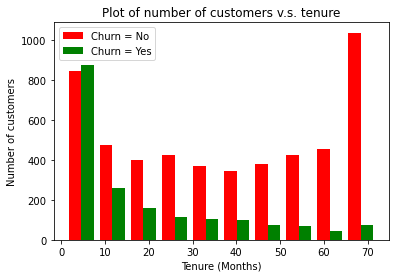

In [8]:
# View how tenure is related to churn rate
tenure_churn_no = df2[df2.Churn == 'No'].tenure
tenure_churn_yes = df2[df2.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color= ['red', 'green'], label= ['Churn = No', 'Churn = Yes'])
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of customers')
plt.title('Plot of number of customers v.s. tenure')
plt.legend()


## Analysis

Between 0 to 10 months: Equally high number of customers who stay and don't stay.

As tenure increases, number of customers who do not churn are generally higher than those who churn.

Moreover, the number of customers who churn at higher tenures are also lower. 

At around 70 months of tenure, high number of customers do not churn.

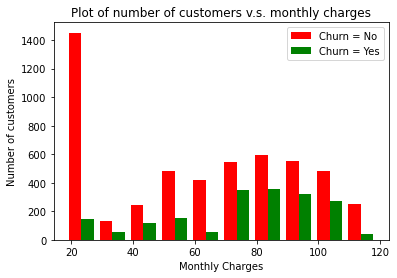

In [9]:
mc_churn_no = df2[df2.Churn == 'No'].MonthlyCharges
mc_churn_yes = df2[df2.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_no, mc_churn_yes], color= ['red', 'green'], label= ['Churn = No', 'Churn = Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Plot of number of customers v.s. monthly charges')
plt.legend()

## Analysis

At low monthly charges, customers who stay is high. This is expected as if they can get a good price for their telco service they are likely to stay.

Around 50 to 100, we see that the number of customers who churn is higher. This is also expected as people will not want to pay high prices for telco services


## Data cleaning

In [10]:
# Looking at all the categorical data

for column in df2:
    if df2[column].dtypes == 'object':
        print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [11]:
# Replace "No internet service" with no so that future label encoding is easier
df2.replace('No internet service', 'No', inplace= True)
df2.replace('No phone service', 'No', inplace= True)
for column in df2:
    if df2[column].dtypes == 'object':
        print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\limzx\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [12]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Binary coding of categorial data
for column in yes_no_col:
    df2[column].replace({'Yes': 1, 'No': 0}, inplace= True)
    


C:\Users\limzx\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
for column in df2:
    print(f'{column} : {df2[column].unique()} ')

gender : ['Female' 'Male'] 
SeniorCitizen : [0 1] 
Partner : [1 0] 
Dependents : [0 1] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService : [0 1] 
MultipleLines : [0 1] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : [0 1] 
OnlineBackup : [1 0] 
DeviceProtection : [0 1] 
TechSupport : [0 1] 
StreamingTV : [0 1] 
StreamingMovies : [0 1] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : [1 0] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn : [0 1] 


In [14]:
df2['gender'].replace({'Female': 1, 'Male': 0}, inplace= True)

In [15]:
# One hot encoding of other categorial data with > 2 categories
df_clean = pd.get_dummies(data= df2, columns= ['InternetService', 'Contract', 'PaymentMethod'])
df_clean.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [16]:
# Scale non categorical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean[col_to_scale] = scaler.fit_transform(df_clean[col_to_scale])
df_clean.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [17]:
X = df_clean.drop('Churn', axis= 1)
y = df_clean['Churn']

## Model training

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)
X_train.shape

(5625, 26)

In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid'), # To keep outputs to 0 and 1
])

model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
176/176 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7335
Epoch 2/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7916
Epoch 3/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8018
Epoch 4/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8043
Epoch 5/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8044


In [20]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 977us/step - loss: 0.4432 - accuracy: 0.7818


[0.4431982934474945, 0.7818052768707275]

In [21]:
y_predict = model.predict(X_test)

y_predict[:5]

array([[0.17511618],
       [0.36723828],
       [0.02060074],
       [0.7552017 ],
       [0.46044967]], dtype=float32)

In [22]:
THRESHOLD = 0.5
y_predict_binary = [1 if i > THRESHOLD else 0 for i in y_predict]
y_predict_binary[:5]

[0, 0, 0, 1, 0]

## Visualization of performance

Text(33.0, 0.5, 'True Labels')

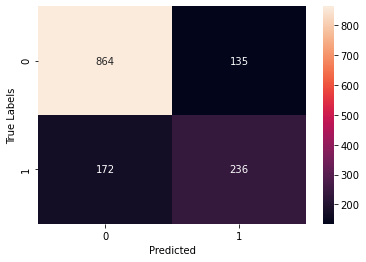

In [23]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_binary)

sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('True Labels')

## Scores

In [26]:
# Recall = True Positive Rate = TP/(TP+FN) a.k.a sensitivity

# Recall for class 1 - YES Churn
recall_1 = round(236/(236+172), 2)

# Recall for class 0 - NO Churn
recall_0 = round(864/(864+135), 2)

print(f'The recall score for class 1 is {recall_1}')
print(f'The recall score for class 0 is {recall_0}')


The recall score for class 1 is 0.58
The recall score for class 0 is 0.86


In [27]:
# Precision = TP/(TP + FP) 

# Precision for class 1 - YES Churn
precision_1 = round(236/(236+135), 2)

# Precision for class 0 - NO Churn
precision_0 = round(864/(864+172), 2)

print(f'The precision score for class 1 is {precision_1}')
print(f'The precision score for class 0 is {precision_0}')

The precision score for class 1 is 0.64
The precision score for class 0 is 0.83
